<a href="https://colab.research.google.com/github/UkeshThapa/Human-Activities-recognition/blob/main/Research_Human_activities_Recognition_TML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research on Human Activities Recognition with TML
#### @author1 : John Bernardo
#### @email1 : jaybz.bernardo@gmail.com

####
#### @author2 : Bipun Man Pati Gubaju
#### @email2 : bemaanpati@gmail.com

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------####



#### Code By:
#### @author : Ukesh Thapa
#### @email : yukeshthapa8@gmail.com


In [32]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold


# 2 Sensors

# Non-overlapping Dataset

In [7]:
def load_dataset_and_merge(file_paths):
  dfs = []

  # Loop through each file, read it into a DataFrame, and append to the list
  for file_path in file_paths:
      df = pd.read_excel(file_path)
      dfs.append(df)
  combined_df = pd.concat(dfs,axis=0, ignore_index=True)

  return combined_df

In [58]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Human Activities Recognition/Dataset/2 Sensors/non-overlapping/Train_Test_Data"
xlsx_name = ["aung","aung_ph","bipun","john","kaung","kavin","manash","person_2","person_3","praew","su"]

split_data_name = ["manash","john"]

train_data_name = []
test_data_name = []

# train data
for name in xlsx_name:
  if name not in split_data_name:
      train_data_name.append(f"{file_path}/final_{name}.xlsx")

for name in split_data_name:
    test_data_name.append(f"{file_path}/final_{name}.xlsx")


df_train = load_dataset_and_merge(train_data_name)
# test
df_test = load_dataset_and_merge(test_data_name)


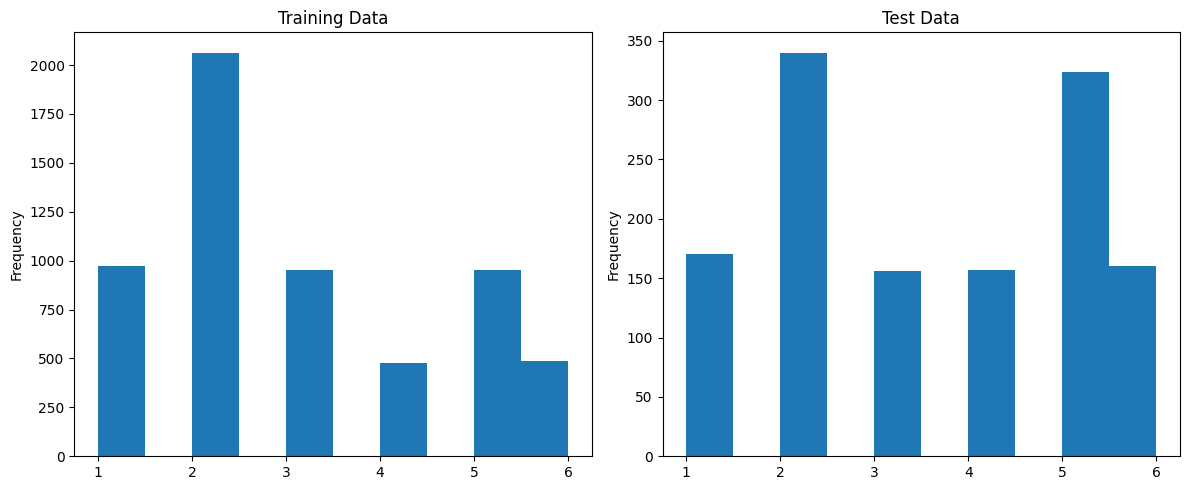

In [59]:
# Data visulaization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns of subplots

# Plot the output column for the training DataFrame in the first subplot (ax1)
ax1.set_title('Training Data')
# Add your visualization for the output column of the training data (e.g., histogram, bar plot, etc.)
df_train['output'].plot(kind='hist', ax=ax1)

# Plot the output column for the test DataFrame in the second subplot (ax2)
ax2.set_title('Test Data')
# Add your visualization for the output column of the test data (e.g., histogram, bar plot, etc.)
df_test['output'].plot(kind='hist', ax=ax2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [60]:
# data normalization
normalize_train_data = df_train.iloc[:, :-1]
scaler = MinMaxScaler()
scaler.fit(normalize_train_data)
df_train.iloc[:, :-1] = scaler.transform(normalize_train_data)

X_train = df_train.iloc[:, :-1].values
y_train = df_train['output'].values


In [61]:
normalize_test_data = df_test.iloc[:, :-1]
scaler.fit(normalize_train_data)
df_test.iloc[:, :-1] = scaler.transform(normalize_test_data)

X_test = df_test.iloc[:, :-1].values
y_test = df_test['output'].values

# KNN

In [11]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameter values to search
param_grid = {
    'n_neighbors': list(range(3,14)),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


# Create a KNN model with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Train the best KNN model on the training data
best_knn.fit(X_train, y_train)

# Evaluate the best model on the test data
accuracy = best_knn.score(X_test, y_test)


y_pred = best_knn.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Classification Report:')
print(classification_rep)

print('Confusion Matrix:')
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.67      0.79       170
           2       0.95      0.92      0.94       340
           3       0.73      0.98      0.84       156
           4       1.00      1.00      1.00       157
           5       0.92      0.95      0.93       324
           6       1.00      1.00      1.00       160

    accuracy                           0.92      1307
   macro avg       0.93      0.92      0.92      1307
weighted avg       0.93      0.92      0.92      1307

Confusion Matrix:
[[114   0  56   0   0   0]
 [  0 313   0   0  27   0]
 [  3   0 153   0   0   0]
 [  0   0   0 157   0   0]
 [  0  16   0   0 308   0]
 [  0   0   0   0   0 160]]


In [15]:
print("Test Data accuracy",accuracy)

Test Data accuracy 0.9219586840091814


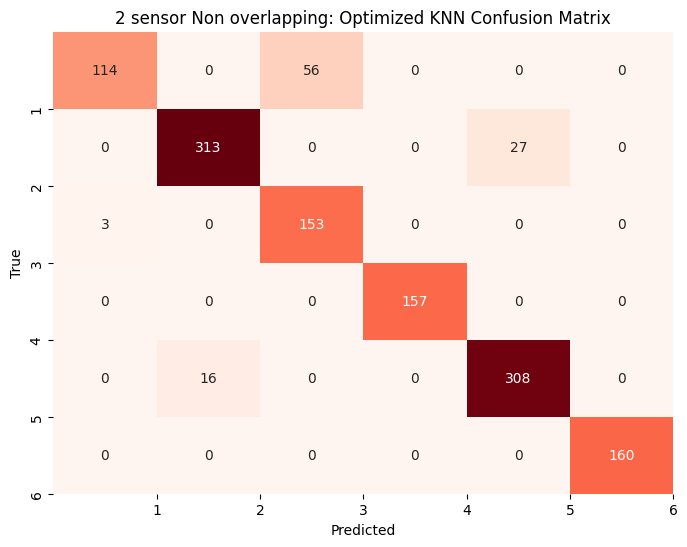

In [16]:


# Visualize the confusion matrix as a heatmap
# confusion_mat = np.array(confusion_mat)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', cbar=False)  # Use cbar=False to remove the color bar
plt.xlabel("Predicted")
plt.ylabel("True")

# Customize the axis ticks to start at 1
plt.xticks(ticks=np.arange(1, confusion_mat.shape[1] + 1), labels=np.arange(1, confusion_mat.shape[1] + 1))
plt.yticks(ticks=np.arange(1, confusion_mat.shape[0] + 1), labels=np.arange(1, confusion_mat.shape[0] + 1))

# Add a title
plt.title("2 sensor Non overlapping: Optimized KNN Confusion Matrix")

# Show the plot
plt.show()

<Figure size 600x500 with 0 Axes>

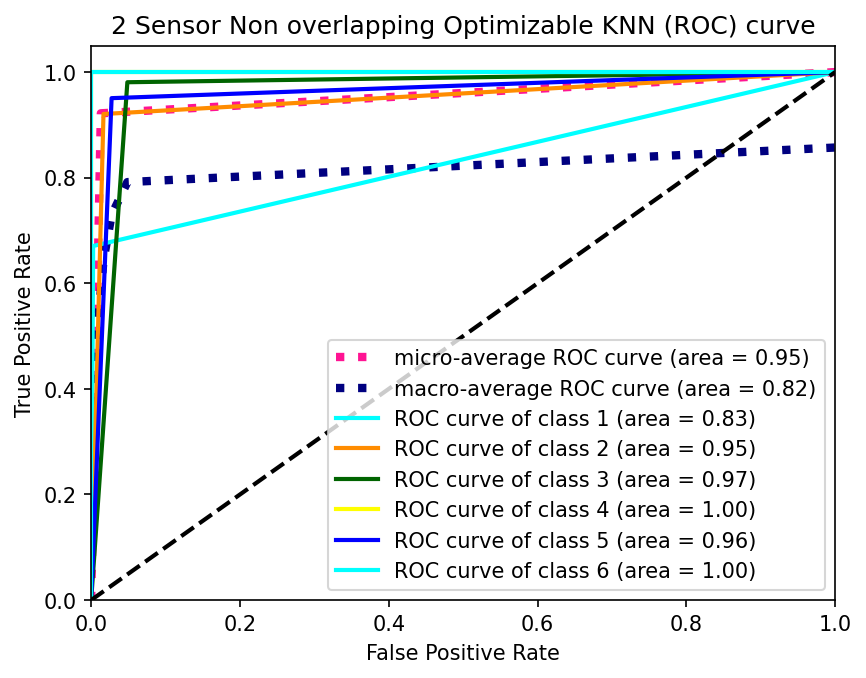

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

n_classes = len(np.unique(y_test)) + 1
y_true = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_t = label_binarize(y_pred, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1, n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_t.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1, n_classes)]))

# Then interpolate all ROC curves at this point
mean_tpr = np.zeros_like(all_fpr)
for i in range(1, n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6, 5))
plt.figure(dpi=150)  # Reduced DPI value for a smaller image

lw = 2
plt.plot(fpr["micro"], tpr["micro"], label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]), color="deeppink", linestyle=":", linewidth=4,)
plt.plot(fpr["macro"], tpr["macro"], label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]), color="navy", linestyle=":", linewidth=4,)

colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
for i, color in zip(range(1, n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("2 Sensor Non overlapping Optimizable KNN (ROC) curve")
plt.legend()

plt.show()


#### Cosine Knn

In [62]:
# Cosine KNN classifier
cosine_knn = KNeighborsClassifier(metric='cosine')

# Define a grid of hyperparameter values to search
param_grid = {
    'n_neighbors': list(range(3,14)),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # Minkowski distance power (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=cosine_knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


# Create a KNN model with the best hyperparameters
cosine_knn = KNeighborsClassifier(**best_params)

# Train the best KNN model on the training data
cosine_knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=4, p=1)

In [63]:

# Evaluate the best model on the test data
cosine_knn_accuracy = cosine_knn.score(X_test, y_test)

cosine_knn_y_pred = cosine_knn.predict(X_test)

cosine_knn_classification_rep = classification_report(y_test, cosine_knn_y_pred)

cosine_knn_confusion_mat = confusion_matrix(y_test, cosine_knn_y_pred)

print('Classification Report:')
print(cosine_knn_classification_rep)

print('Confusion Matrix:')
print(cosine_knn_confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.71      0.81       170
           2       0.94      0.91      0.92       340
           3       0.75      0.96      0.85       156
           4       1.00      1.00      1.00       157
           5       0.91      0.94      0.92       324
           6       1.00      1.00      1.00       160

    accuracy                           0.92      1307
   macro avg       0.93      0.92      0.92      1307
weighted avg       0.92      0.92      0.92      1307

Confusion Matrix:
[[121   0  49   0   0   0]
 [  0 309   0   0  31   0]
 [  6   0 150   0   0   0]
 [  0   0   0 157   0   0]
 [  0  21   0   0 303   0]
 [  0   0   0   0   0 160]]


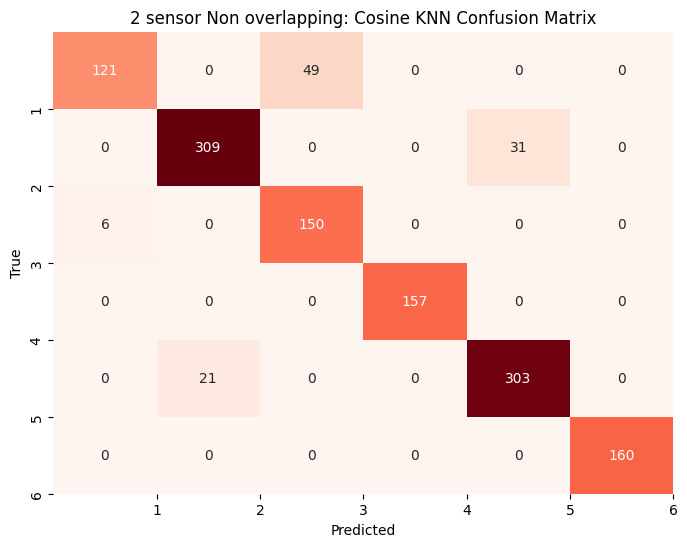

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix as a heatmap
# confusion_mat = np.array(confusion_mat)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(cosine_knn_confusion_mat, annot=True, fmt='d', cmap='Reds', cbar=False)  # Use cbar=False to remove the color bar
plt.xlabel("Predicted")
plt.ylabel("True")

# Customize the axis ticks to start at 1
plt.xticks(ticks=np.arange(1, cosine_knn_confusion_mat.shape[1] + 1), labels=np.arange(1, cosine_knn_confusion_mat.shape[1] + 1))
plt.yticks(ticks=np.arange(1, cosine_knn_confusion_mat.shape[0] + 1), labels=np.arange(1, cosine_knn_confusion_mat.shape[0] + 1))

# Add a title
plt.title("2 sensor Non overlapping: Cosine KNN Confusion Matrix")

# Show the plot
plt.show()

<Figure size 600x500 with 0 Axes>

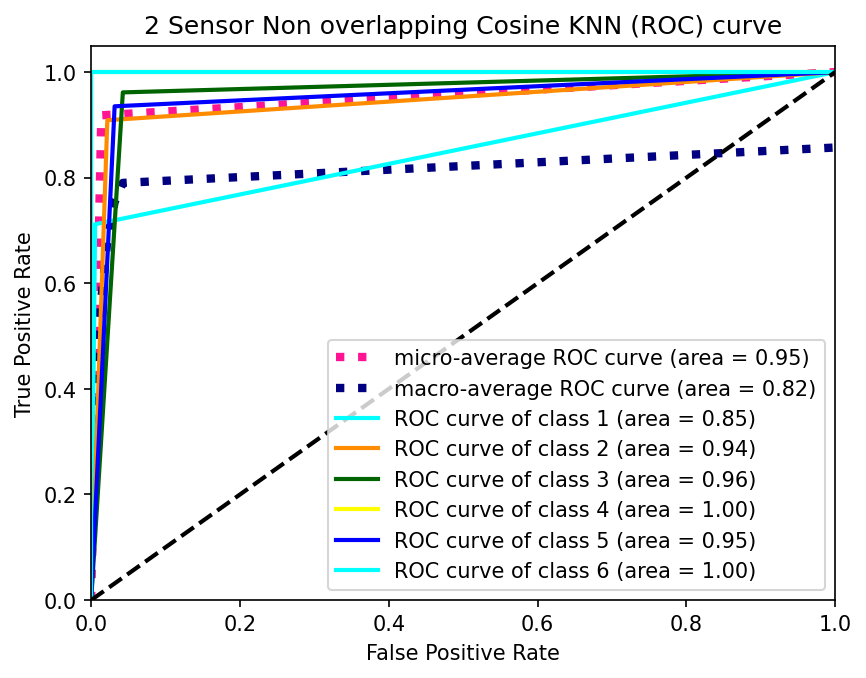

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

n_classes = len(np.unique(y_test)) + 1
y_true = label_binarize(y_test, classes=np.arange(n_classes))
cosine_knn_y_pred_t = label_binarize(cosine_knn_y_pred, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1, n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], cosine_knn_y_pred_t[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), cosine_knn_y_pred_t.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(1, n_classes)]))

# Then interpolate all ROC curves at this point
mean_tpr = np.zeros_like(all_fpr)
for i in range(1, n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(6, 5))
plt.figure(dpi=150)  # Reduced DPI value for a smaller image

lw = 2
plt.plot(fpr["micro"], tpr["micro"], label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]), color="deeppink", linestyle=":", linewidth=4,)
plt.plot(fpr["macro"], tpr["macro"], label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]), color="navy", linestyle=":", linewidth=4,)

colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
for i, color in zip(range(1, n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("2 Sensor Non overlapping Cosine KNN (ROC) curve")
plt.legend()

plt.show()


# Cross Validation

In [66]:
cv_data_name = []
for name in xlsx_name:
    cv_data_name.append(f"{file_path}/final_{name}.xlsx")

df_all = load_dataset_and_merge(cv_data_name)

normalize_all_data = df_all.iloc[:, :-1]
scaler.fit(normalize_all_data)
df_all.iloc[:, :-1] = scaler.transform(normalize_all_data)

X = df_all.iloc[:, :-1].values
y = df_all['output'].values

In [67]:
cosine_knn

KNeighborsClassifier(n_neighbors=4, p=1)

In [53]:
  # Choose the number of folds for cross-validation
n_splits = 30  # Adjust as needed

# Initialize lists to store evaluation metrics for each fold
metrics = []

# Perform k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # You can choose a different random state

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifier on the training data
    cosine_knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = cosine_knn.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append the scores to the respective lists
    metrics_params = {
        'Test accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'f1_scores' : f1
    }

    metrics.append(metrics_params)


# Initialize dictionaries to store the sum and count for each metric
sum_accuracy = 0
sum_precision = 0
sum_recall = 0
sum_f1_scores = 0

count_metrics = len(metrics)

# Calculate the sum for each metric
for metric in metrics:
    sum_accuracy += metric['Test accuracy']
    sum_precision += metric['Precision']
    sum_recall += metric['Recall']
    sum_f1_scores += metric['f1_scores']

# Calculate the mean for each metric
mean_accuracy = sum_accuracy / count_metrics
mean_precision = sum_precision / count_metrics
mean_recall = sum_recall / count_metrics
mean_f1_scores = sum_f1_scores / count_metrics

# Print the mean for each metric
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Mean Precision: {mean_precision:.3f}")
print(f"Mean Recall: {mean_recall:.3f}")
print(f"Mean F1-Score: {mean_f1_scores:.3f}")


Mean Accuracy: 0.971
Mean Precision: 0.983
Mean Recall: 0.975
Mean F1-Score: 0.978
